# Import libraries and load data

### Import libraries

In [1]:
# data processing and visualisition
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# text processing
# import re
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from wordcloud import WordCloud
# import string
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


### Load data

In [2]:
path = "/home/vitalii/source/ml_unn_mag1/data/spotify_songs.csv"
data = pd.read_csv(path)

# 09.11.23

### Чтение данных

In [3]:
data.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [4]:
data.shape

(32833, 23)

In [5]:
data.tail()

track_id                            track_name  \
32828  7bxnKAamR3snQ1VGLuVfC1  City Of Lights - Official Radio Edit   
32829  5Aevni09Em4575077nkWHz   Closer - Sultan & Ned Shepard Remix   
32830  7ImMqPP3Q1yfUHvsdn7wEo          Sweet Surrender - Radio Edit   
32831  2m69mhnfQ1Oq6lGtXuYhgX        Only For You - Maor Levi Remix   
32832  29zWqhca3zt5NsckZqDf6c                Typhoon - Original Mix   

         track_artist  track_popularity          track_album_id  \
32828    Lush & Simon                42  2azRoBBWEEEYhqV6sb7JrT   
32829  Tegan and Sara                20  6kD6KLxj7s8eCE3ABvAyf5   
32830     Starkillers                14  0ltWNSY9JgxoIZO4VzuCa6   
32831          Mat Zo                15  1fGrOkHnHJcStl14zNx8Jy   
32832    Julian Calor                27  0X3mUOm6MhxR7PzxG95rAo   

                   track_album_name track_album_release_date    playlist_name  \
32828    City Of Lights (Vocal Mix)               2014-04-28  ♥ EDM LOVE 2020   
32829                Closer Remixed               2013-03-08  ♥ EDM LOVE 2020   
32830  Sweet Surrender (Radio Edit)               2014-04-21  ♥ EDM LOVE 2020   
32831        Only For You (Remixes)               2014-01-01  ♥ EDM LOVE 2020   
32832                 Typhoon/Storm               2014-03-03  ♥ EDM LOVE 2020   

                  playlist_id playlist_genre  ... key  loudness  mode  \
32828  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   2    -1.814     1   
32829  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   0    -4.462     1   
32830  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   6    -4.899     0   
32831  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   2    -3.361     1   
32832  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   5    -4.571     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
32828       0.0936      0.076600          0.000000    0.0668   0.2100   
32829       0.0420      0.001710          0.004270    0.3750   0.4000   
32830       0.0481      0.108000          0.000001    0.1500   0.4360   
32831       0.1090      0.007920          0.127000    0.3430   0.3080   
32832       0.0385      0.000133          0.341000    0.7420   0.0894   

         tempo  duration_ms  
32828  128.170       204375  
32829  128.041       353120  
32830  127.989       210112  
32831  128.008       367432  
32832  127.984       337500  

[5 rows x 23 columns]

In [6]:
data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [7]:
data.index

RangeIndex(start=0, stop=32833, step=1)

In [8]:
data.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [9]:
data_numbers = data[['track_popularity', 
                     'danceability', 
                     'energy', 
                     'key', 
                     'loudness', 
                     'mode', 
                     'speechiness', 
                     'acousticness',
                     'instrumentalness',
                     'liveness',
                     'valence',
                     'tempo',
                     'duration_ms']]

In [10]:
data_numbers.head()

track_popularity  danceability  energy  key  loudness  mode  speechiness  \
0                66         0.748   0.916    6    -2.634     1       0.0583   
1                67         0.726   0.815   11    -4.969     1       0.0373   
2                70         0.675   0.931    1    -3.432     0       0.0742   
3                60         0.718   0.930    7    -3.778     1       0.1020   
4                69         0.650   0.833    1    -4.672     1       0.0359   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  
0        0.1020          0.000000    0.0653    0.518  122.036       194754  
1        0.0724          0.004210    0.3570    0.693   99.972       162600  
2        0.0794          0.000023    0.1100    0.613  124.008       176616  
3        0.0287          0.000009    0.2040    0.277  121.956       169093  
4        0.0803          0.000000    0.0833    0.725  123.976       189052

##### Удаление столбцов

Удаляются признаки, которые не имеют значения для нашей задачи и столбцы, чья обработка пока затруднена.

In [11]:
data.drop(['track_id', 
           'track_album_id',
           'playlist_id',
           'playlist_subgenre',
           'track_artist',
           'track_album_name',
           'playlist_name'], axis=1, inplace=True)

### Визуализация данных и вычисление основных характеристик (среднее, разброс, корреляционная матрица и др.). Интерпретация

##### Диаграмма рассеивания 

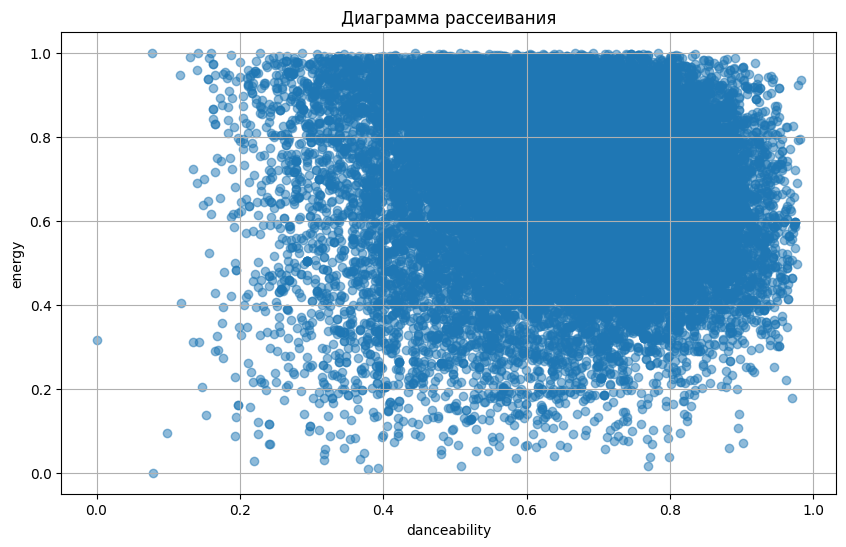

In [12]:
plt.figure(figsize=(10, 6))

plt.scatter(data['danceability'], data['energy'], alpha=0.5)
plt.title("Диаграмма рассеивания")
plt.xlabel("danceability")
plt.ylabel("energy")
plt.grid(True)
plt.show()

На рисунке представлена диаграмма рассеяния для двух признаков: energy и danceability. На диаграмме видно пятно из точек, по которому трудно сказать о явном отношении между двумя переменными. Вместе с этим видно, что существуют точки, значительно отклонённые от общего скопления, например точка (0.0, ~0.3), (~0.1, 0.0) и подобные им. Точки с такими координатами (значениями признаков) можно посчитать выбросами.


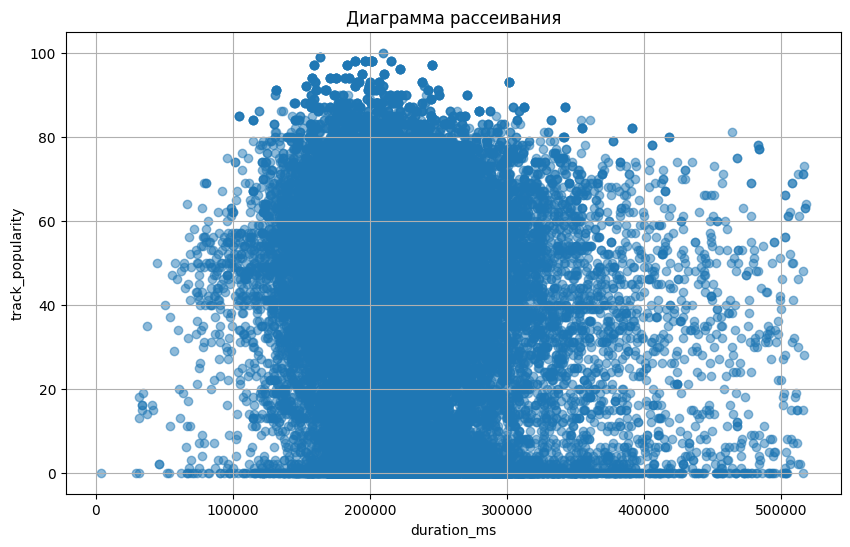

In [13]:
plt.figure(figsize=(10, 6))

plt.scatter(data['duration_ms'], data['track_popularity'], alpha=0.5)
plt.title("Диаграмма рассеивания")
plt.xlabel("duration_ms")
plt.ylabel("track_popularity")
plt.grid(True)
plt.show()

Рассмотрим диаграмму рассеяния для признаков track_popularity и duration_ms. На рисунки видны общие черты с предыдущим изображением точек для двух признаков. Мы также видим пятно из множества точек и разброс точек от этого пятна в стороны. По диаграмме нельзя предположить об отношении двух признаков. Рядом с координатой (0.0, 0.0) присутствуют значения, которые могут являться выбросами, так как это наиболее удалённые точки от пятна.

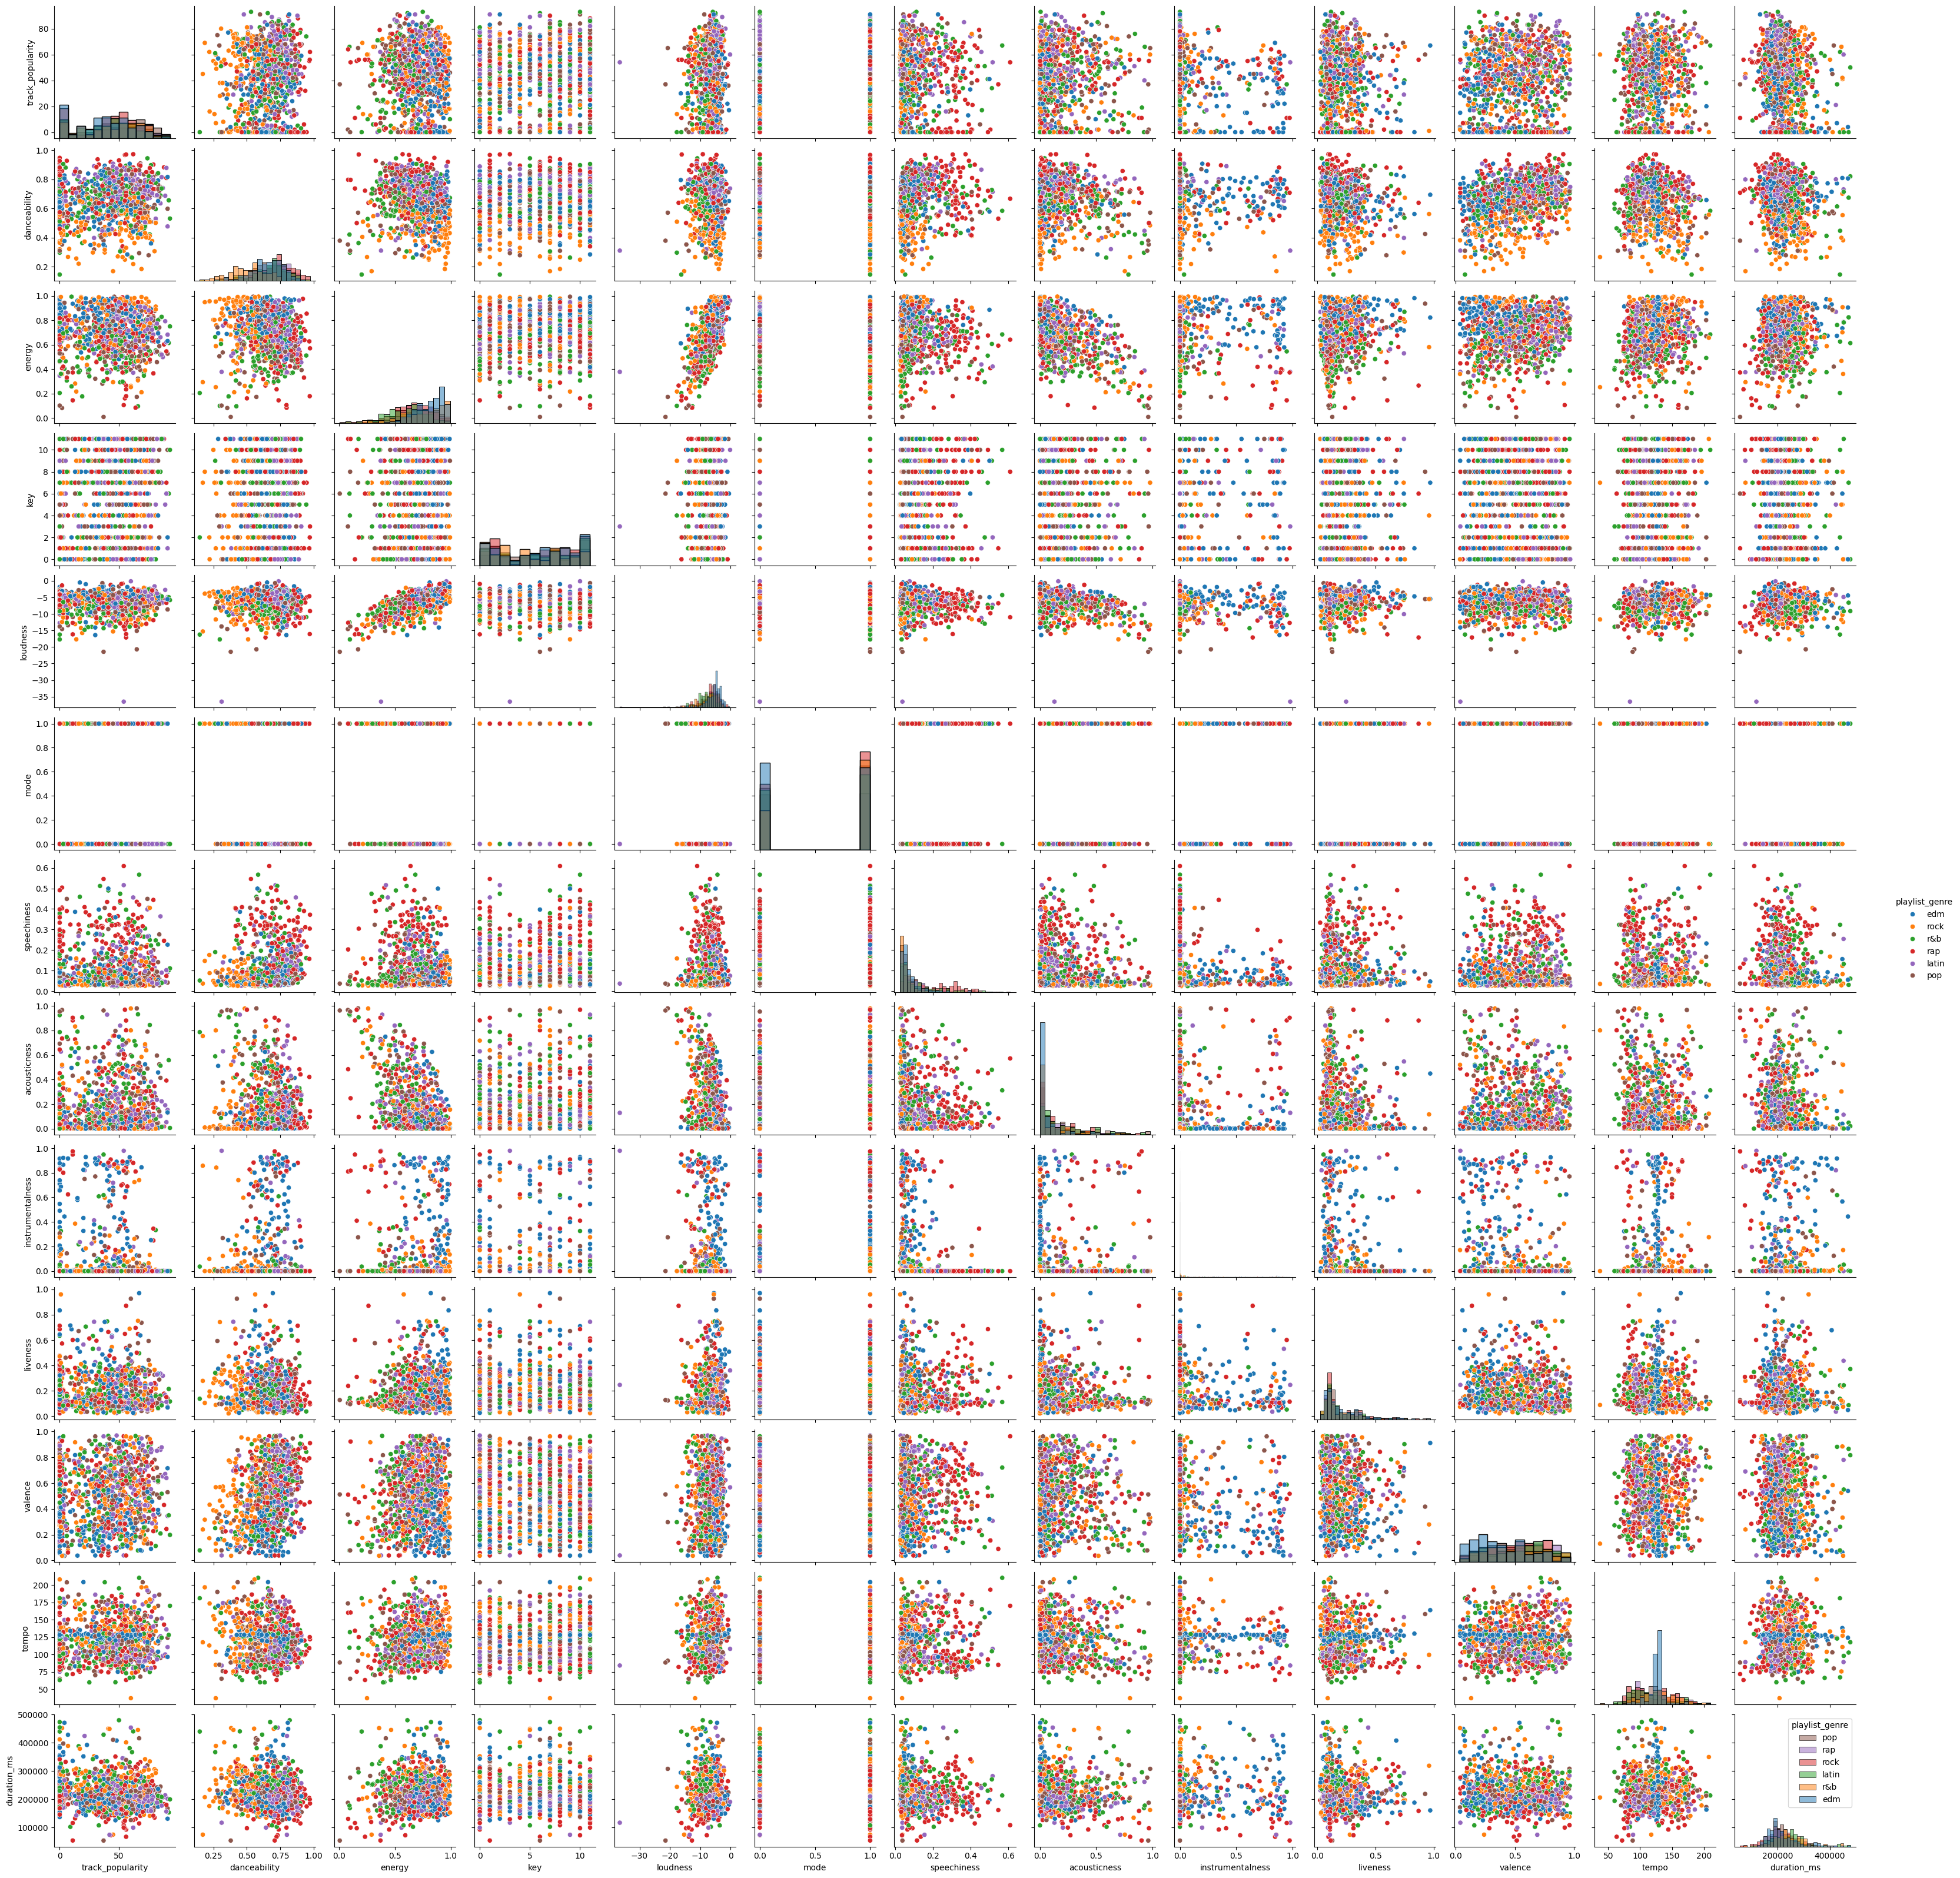

In [14]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]),
                                 size=1000,
                                 replace=False)

sns.pairplot(data.iloc[random_subset], hue='playlist_genre', diag_kind='hist')
plt.legend(title='playlist_genre', labels=data['playlist_genre'].unique())
plt.show()
pass

На рисунке представлена матрица диаграмм рассеяния. При осмотре диаграмм видно, что большинство пар признаков не имеет корреляции между собой, о чём свидетельствуют скопления точек в виде пятен или горизонтальных/вертикальных прямых, которые говорят об отсутствии корреляции между переменными. Тем не менее, среди диаграмм можно увидеть пары признаков, при которых скопление точек может быть направлено по возрастающей или убывающей наклонной прямой, что может означать положительную или отрицательную корреляцию соответственно.

In [15]:
data_numbers.corr().where(np.triu(data_numbers.corr() > 0.2, k=1)).stack().sort_values(ascending=False)

energy        loudness    0.676625
danceability  valence     0.330523
dtype: float64

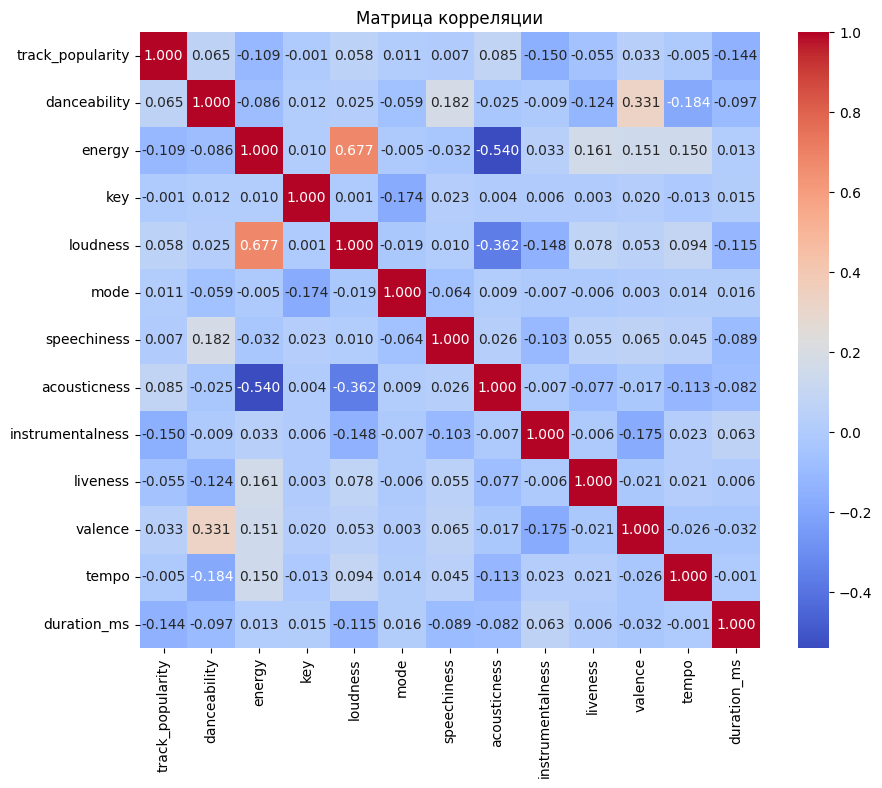

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_numbers.corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt=".3f")
plt.title('Матрица корреляции')
plt.show()

Полученная матрица корреляции явно демонстрирует наши выводы, сделанные на основе визуального анализа диаграмм рассеяния для пар признаков. Пересечение двух переменных самих с собой даёт очевидно наибольшее значение корреляции и это соответственно главная диагональ. Значения выше и ниже главной диагонали симметричные. Как мы видим, большинство переменных не имеет корреляции в паре, о чём свидетельствуют околонулевые численные показатели в ячейках. Видно несколько пар с положитедьной корреляцией: (danceability и valence: 0.331), (danceability и speechiness: 0.182) и (key и loudness: 0.677). Присутствует много пар с отрицательной корреляцией. Отметим наиболее значимые пары с такой характеристикой: (energy и acoustucness: -0.540), (loudness и acousticness: -0.362)

In [17]:
print(data['playlist_genre'].unique())
print()
# print(data['playlist_subgenre'].unique())

['pop' 'rap' 'rock' 'latin' 'r&b' 'edm']



In [18]:
print(data['playlist_genre'].value_counts())
print()
# print(data['playlist_subgenre'].value_counts())

playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64



In [19]:
data.describe()

track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.084747      0.190176      0.510561    120.881132   
std            0.224230      0.154317      0.233146     26.903624   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.960000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32833.000000  
mean   225799.811622  
std     59834.006182  
min      4000.000000  
25%    187819.000000  
50%    216000.000000  
75%    253585.000000  
max    517810.000000

### Обработка пропущенных значений

In [20]:
data.isna().sum()

track_name                  5
track_popularity            0
track_album_release_date    0
playlist_genre              0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [21]:
data[data.isnull().any(axis=1)]

track_name  track_popularity track_album_release_date playlist_genre  \
8151         NaN                 0               2012-01-05            rap   
9282         NaN                 0               2017-12-01            rap   
9283         NaN                 0               2017-12-01            rap   
19568        NaN                 0               2012-01-05          latin   
19811        NaN                 0               2012-01-05          latin   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
8151          0.714   0.821    6    -7.635     1       0.1760        0.0410   
9282          0.678   0.659   11    -5.364     0       0.3190        0.0534   
9283          0.465   0.820   10    -5.907     0       0.3070        0.0963   
19568         0.675   0.919   11    -6.075     0       0.0366        0.0606   
19811         0.714   0.821    6    -7.635     1       0.1760        0.0410   

       instrumentalness  liveness  valence    tempo  duration_ms  
8151            0.00000    0.1160    0.649   95.999       282707  
9282            0.00000    0.5530    0.191  146.153       202235  
9283            0.00000    0.0888    0.505   86.839       206465  
19568           0.00653    0.1030    0.726   97.017       252773  
19811           0.00000    0.1160    0.649   95.999       282707

In [22]:
data.dropna(inplace=True)

In [23]:
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [track_name, track_popularity, track_album_release_date, playlist_genre, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms]
Index: []

### Обработка категориальных признаков

In [24]:
Y = data['playlist_genre']
data = data.drop(['playlist_genre'], axis=1)

enc = OneHotEncoder(sparse=False)
Y = enc.fit_transform(pd.DataFrame(Y))
print(Y[:5])
print(enc.categories_)
pass

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
[array(['edm', 'latin', 'pop', 'r&b', 'rap', 'rock'], dtype=object)]


/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Обработка даты (year-month-day) + Обработка пустых строк

In [25]:
data['track_album_release_date']

0        2019-06-14
1        2019-12-13
2        2019-07-05
3        2019-07-19
4        2019-03-05
            ...    
32828    2014-04-28
32829    2013-03-08
32830    2014-04-21
32831    2014-01-01
32832    2014-03-03
Name: track_album_release_date, Length: 32828, dtype: object

In [26]:
data['track_album_release_date'][0]

'2019-06-14'

In [27]:
print(data['track_album_release_date'].str.len().max())
print(data['track_album_release_date'].str.len().min())


10
4


In [28]:
print((data['track_album_release_date'].str.len() < 5).sum())

1855


In [29]:
data[data['track_album_release_date'].str.len() < 5]

track_name  track_popularity  \
151    Stay The Night - Featuring Hayley Williams Of ...                61   
749                        We like to Party! (Six Flags)                51   
750                          Coco Jamboo - Radio Version                18   
751                                     Blue (Da Ba Dee)                16   
753                                         What Is Love                70   
...                                                  ...               ...   
32360                                 Faith - Radio Edit                 0   
32767                                          Push Play                39   
32774                 Lessons In Love (feat. Neon Trees)                23   
32775   Turn It Down (with Rebecca & Fiona) - Radio Edit                13   
32827                             Many Ways - Radio Edit                27   

      track_album_release_date  danceability  energy  key  loudness  mode  \
151                       2012         0.596   0.738    8    -3.109     1   
749                       1998         0.785   0.905    8    -7.929     1   
750                       1996         0.832   0.838    1    -5.414     0   
751                       1999         0.822   0.969    7   -11.471     0   
753                       1993         0.683   0.772    7    -7.907     0   
...                        ...           ...     ...  ...       ...   ...   
32360                     2013         0.672   0.692    9    -6.566     0   
32767                     2012         0.604   0.921    9    -1.440     1   
32774                     2011         0.585   0.814    7    -4.335     1   
32775                     2011         0.509   0.669    5    -7.922     0   
32827                     2013         0.581   0.640    5    -8.367     1   

       speechiness  acousticness  instrumentalness  liveness  valence  \
151         0.0411       0.10900          0.000000    0.0947    0.461   
749         0.0449       0.00803          0.859000    0.0460    0.969   
750         0.0421       0.07910          0.000000    0.1520    0.965   
751         0.0582       0.25900          0.000162    0.3900    0.765   
753         0.0311       0.02220          0.014900    0.2030    0.737   
...            ...           ...               ...       ...      ...   
32360       0.0486       0.00636          0.002310    0.1870    0.670   
32767       0.0459       0.08680          0.000000    0.0841    0.252   
32774       0.0540       0.02650          0.000013    0.1330    0.597   
32775       0.0455       0.05360          0.008350    0.3390    0.413   
32827       0.0365       0.02660          0.000000    0.5720    0.288   

         tempo  duration_ms  
151    127.961       217347  
749    136.018       224227  
750    100.019       218733  
751    128.007       283748  
753    123.871       270373  
...        ...          ...  
32360  128.009       183067  
32767  130.030       219360  
32774  127.989       247693  
32775  126.971       238360  
32827  128.001       196993  

[1855 rows x 15 columns]

In [30]:
data['release_year'] = data['track_album_release_date'].str.slice(0, 4)
data['release_month'] = data['track_album_release_date'].str.slice(5, 7)

In [31]:
data.head()

track_name  track_popularity  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...                66   
1                    Memories - Dillon Francis Remix                67   
2                    All the Time - Don Diablo Remix                70   
3                  Call You Mine - Keanu Silva Remix                60   
4            Someone You Loved - Future Humans Remix                69   

  track_album_release_date  danceability  energy  key  loudness  mode  \
0               2019-06-14         0.748   0.916    6    -2.634     1   
1               2019-12-13         0.726   0.815   11    -4.969     1   
2               2019-07-05         0.675   0.931    1    -3.432     0   
3               2019-07-19         0.718   0.930    7    -3.778     1   
4               2019-03-05         0.650   0.833    1    -4.672     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0583        0.1020          0.000000    0.0653    0.518  122.036   
1       0.0373        0.0724          0.004210    0.3570    0.693   99.972   
2       0.0742        0.0794          0.000023    0.1100    0.613  124.008   
3       0.1020        0.0287          0.000009    0.2040    0.277  121.956   
4       0.0359        0.0803          0.000000    0.0833    0.725  123.976   

   duration_ms release_year release_month  
0       194754         2019            06  
1       162600         2019            12  
2       176616         2019            07  
3       169093         2019            07  
4       189052         2019            03

In [32]:
data[data['track_album_release_date'] == "2012"].head()

track_name  track_popularity  \
151   Stay The Night - Featuring Hayley Williams Of ...                61   
1256                               Timber (feat. Ke$ha)                76   
1443                                            Classic                77   
1597                               Timber (feat. Ke$ha)                76   
2906                               Timber (feat. Ke$ha)                76   

     track_album_release_date  danceability  energy  key  loudness  mode  \
151                      2012         0.596   0.738    8    -3.109     1   
1256                     2012         0.581   0.963   11    -4.087     1   
1443                     2012         0.720   0.791    1    -4.689     1   
1597                     2012         0.581   0.963   11    -4.087     1   
2906                     2012         0.581   0.963   11    -4.087     1   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
151        0.0411        0.1090               0.0    0.0947    0.461  127.961   
1256       0.0981        0.0295               0.0    0.1390    0.788  129.992   
1443       0.1240        0.0384               0.0    0.1570    0.756  102.071   
1597       0.0981        0.0295               0.0    0.1390    0.788  129.992   
2906       0.0981        0.0295               0.0    0.1390    0.788  129.992   

      duration_ms release_year release_month  
151        217347         2012                
1256       204160         2012                
1443       175427         2012                
1597       204160         2012                
2906       204160         2012

In [33]:
data.iloc[151].release_month

''

In [34]:
data['track_album_release_date'][0]

'2019-06-14'

In [35]:
data['release_month'] = data['release_month'].replace('', pd.NA)
data['release_month'] = pd.to_numeric(data['release_month'])

data['release_year'] = pd.to_numeric(data['release_year'])

In [36]:
data.isna().sum()

track_name                     0
track_popularity               0
track_album_release_date       0
danceability                   0
energy                         0
key                            0
loudness                       0
mode                           0
speechiness                    0
acousticness                   0
instrumentalness               0
liveness                       0
valence                        0
tempo                          0
duration_ms                    0
release_year                   0
release_month               1855
dtype: int64

In [37]:
data['release_month'] = data['release_month'].fillna(data['release_month'].median()).astype(int)

In [38]:
data.isna().sum()

track_name                  0
track_popularity            0
track_album_release_date    0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
release_year                0
release_month               0
dtype: int64

In [39]:
data.drop(['track_album_release_date'], axis=1, inplace=True)

In [40]:
print("year_min:", data['release_year'].min(), 
      "year_max:", data['release_year'].max())
print("month_min:", data['release_month'].min(), 
      "month_max:", data['release_month'].max())

year_min: 1957 year_max: 2020
month_min: 1 month_max: 12


In [41]:
data.head()

track_name  track_popularity  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...                66   
1                    Memories - Dillon Francis Remix                67   
2                    All the Time - Don Diablo Remix                70   
3                  Call You Mine - Keanu Silva Remix                60   
4            Someone You Loved - Future Humans Remix                69   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1         0.726   0.815   11    -4.969     1       0.0373        0.0724   
2         0.675   0.931    1    -3.432     0       0.0742        0.0794   
3         0.718   0.930    7    -3.778     1       0.1020        0.0287   
4         0.650   0.833    1    -4.672     1       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  duration_ms  release_year  \
0          0.000000    0.0653    0.518  122.036       194754          2019   
1          0.004210    0.3570    0.693   99.972       162600          2019   
2          0.000023    0.1100    0.613  124.008       176616          2019   
3          0.000009    0.2040    0.277  121.956       169093          2019   
4          0.000000    0.0833    0.725  123.976       189052          2019   

   release_month  
0              6  
1             12  
2              7  
3              7  
4              3

### Обработка текстовых признаков

In [42]:
# Мешок слов ...

data.drop(['track_name'], axis=1, inplace=True)  # 'playlist_name'

### Нормализация данных (нормализация количественных признаков)

In [43]:
data = (data - data.mean(axis=0))/data.std(axis=0)
data.describe()

track_popularity  danceability        energy           key  \
count      3.282800e+04  3.282800e+04  3.282800e+04  3.282800e+04   
mean       6.731412e-17  3.002080e-16  1.426367e-16  1.048401e-17   
std        1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min       -1.700670e+00 -4.513354e+00 -3.860511e+00 -1.487981e+00   
25%       -7.399199e-01 -6.330503e-01 -6.500405e-01 -9.342051e-01   
50%        1.007366e-01  1.181984e-01  1.238001e-01  1.733458e-01   
75%        7.812681e-01  7.316034e-01  7.815645e-01  1.004009e+00   
max        2.302456e+00  2.261670e+00  1.665954e+00  1.557785e+00   

           loudness          mode   speechiness  acousticness  \
count  3.282800e+04  3.282800e+04  3.282800e+04  3.282800e+04   
mean   2.359241e-17 -6.782817e-17  2.997751e-17 -6.168657e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.329316e+01 -1.141363e+00 -1.056724e+00 -7.983428e-01   
25%   -4.857463e-01 -1.141363e+00 -6.520135e-01 -7.295953e-01   
50%    1.852110e-01  8.761186e-01 -4.397871e-01 -4.322966e-01   
75%    6.941380e-01  8.761186e-01  2.462471e-01  3.626247e-01   
max    2.674972e+00  8.761186e-01  8.004849e+00  3.727154e+00   

       instrumentalness      liveness       valence         tempo  \
count      3.282800e+04  3.282800e+04  3.282800e+04  3.282800e+04   
mean      -1.385242e-17  1.227238e-16 -3.571328e-16  5.917041e-16   
std        1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min       -3.779791e-01 -1.232399e+00 -2.189803e+00 -4.493209e+00   
25%       -3.779791e-01 -6.316726e-01 -7.701253e-01 -7.776884e-01   
50%       -3.779073e-01 -4.093973e-01  6.193909e-03  4.090000e-02   
75%       -3.564402e-01  3.747223e-01  7.825131e-01  4.844925e-01   
max        4.054676e+00  5.222007e+00  2.060652e+00  4.406705e+00   

        duration_ms  release_year  release_month  
count  3.282800e+04  3.282800e+04   3.282800e+04  
mean  -1.965313e-16  9.320084e-15  -2.705551e-18  
std    1.000000e+00  1.000000e+00   1.000000e+00  
min   -3.706715e+00 -4.741265e+00  -1.514222e+00  
25%   -6.349358e-01 -2.747217e-01  -9.620881e-01  
50%   -1.637267e-01  4.259125e-01   1.421793e-01  
75%    4.643391e-01  6.886504e-01   9.703798e-01  
max    4.880185e+00  7.762296e-01   1.522514e+00

### Разбиение данных на обучающую и тестовую выборки

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data, Y.astype(int), test_size=0.25, random_state=43)

N_train, _ = X_train.shape
N_test, _ = X_test.shape

N_train, N_test

(24621, 8207)

In [45]:
X_train.shape

(24621, 15)

### Запуск классификатора ближайших соседей и подбор оптимальных параметров

In [191]:
parameters = {'n_neighbors':[1, 2, 5, 50]}
model = KNeighborsClassifier()
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 5, 50]})

In [192]:
clf.best_params_, clf.best_score_

({'n_neighbors': 1}, 0.44384830953333304)

In [193]:
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

In [194]:
accuracy_train = accuracy_score(y_train, y_train_predict)
accuracy_test = accuracy_score(y_test, y_test_predict)
precision_train = precision_score(y_train, y_train_predict, average = 'macro')
precision_test = precision_score(y_test, y_test_predict, average = 'macro')
recall_train = recall_score(y_train, y_train_predict, average = 'macro')
recall_test = recall_score(y_test, y_test_predict, average = 'macro')
f1_train = f1_score(y_train, y_train_predict, average = 'macro')
f1_test = f1_score(y_test, y_test_predict, average = 'macro')

In [195]:
print(accuracy_train, accuracy_test)
print(precision_train, precision_test)
print(recall_train, recall_test)
print(f1_train, f1_test)

0.9411071849234394 0.4468136956256854
0.9414597034521156 0.45127369891672436
0.9413841820363723 0.4489968360194081
0.9414184784703318 0.449377326156414


Таким образом,  применение классификатора на основе метода k ближайших соседей даёт наилучший результат в нашей задаче при k=1. Причинами такого результата могут быть:
- Тесный характер расположения данных
- Дисбаланс классов
- Наличие выбросов

По результатам анализа данных можно сделать следующие выводы:
- Пропущенные значения составляют <0.0002%
- Представлены разнородные признаки (имена, названия, категории,  числовые атрибуты)
- Классы по целевому атрибуту несбалансированы (6043/5746/5507/5431/5155/4951)

Предобработка данных (проблемы):
- При попытке провести токенизацию для текстовых признаков ломалось ядро kaggle, проблема не решена.

# 28.12.23

### Логистическая регрессия

Для сравнения качества моделей используются метрики precision, recall и f1-score. Для удобства сравнения будем использовать таблицу, куда будут записываться полученные значения метрик после работы с моделью.  
Мы используем макроусерднение для вычисления метрик. Такой подход может быть полезным в нашей ситуации, так как у нас присутствует небольшой дисбаланс классов.

In [46]:
columns = [
    "Model",
    "Precision_train",
    "Precision_test",
    "Recall_train",
    "Recall_test",
    "F1_train",
    "F1_test"
]

result_table = pd.DataFrame(columns=columns)

def GetPredictResults(model, X):
    return model.predict(X)

def AddResultsIntoTable(table,
                        model_name, 
                        y_train,
                        y_train_pred, 
                        y_test,
                        y_test_pred):

    precision_train = precision_score(y_train, y_train_pred, average='macro', zero_division=1)
    precision_test = precision_score(y_test, y_test_pred, average='macro', zero_division=1)

    recall_train = recall_score(y_train, y_train_pred, average='macro', zero_division=1)
    recall_test = recall_score(y_test, y_test_pred, average='macro', zero_division=1)

    f1_train = f1_score(y_train, y_train_pred, average='macro', zero_division=1)
    f1_test = f1_score(y_test, y_test_pred, average='macro', zero_division=1)

    results = pd.DataFrame({
        "Model": [model_name],
        "Precision_train": [precision_train],
        "Precision_test": [precision_test],
        "Recall_train": [recall_train],
        "Recall_test": [recall_test],
        "F1_train": [f1_train],
        "F1_test": [f1_test]
    })

    return pd.concat([table, results], ignore_index=True)

def GetBestResult(model):
    print('best_params:', model.best_params_)
    print('best_score:', model.best_score_ )

    return model.best_params_

def PlotConfusionMatrix(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    cm = np.sqrt(cm)
    plt.imshow(cm, interpolation = 'nearest')
    plt.set_cmap('hot')
    plt.xticks(range(4))
    plt.yticks(range(4))
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.colorbar()


In [47]:
logistic_reg_model = LogisticRegression(penalty='l2',
                                        solver = 'lbfgs',
                                        random_state=42)

logistic_reg_model.fit(X_train, y_train.argmax(axis = 1))

y_train_pred = GetPredictResults(logistic_reg_model, X_train)
y_test_pred = GetPredictResults(logistic_reg_model, X_test)

result_table = AddResultsIntoTable(result_table,
                                "LogisticRegression",
                                y_train.argmax(axis = 1),
                                y_train_pred,
                                y_test.argmax(axis = 1),
                                y_test_pred)

/tmp/ipykernel_7875/789101062.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([table, results], ignore_index=True)


In [48]:
result_table

Model  Precision_train  Precision_test  Recall_train  \
0  LogisticRegression           0.4885        0.498471      0.493183   

   Recall_test  F1_train   F1_test  
0     0.505033  0.489048  0.498841

In [49]:
parameters = {'penalty':['l1', 'l2'],
              'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag'],
              'C': np.logspace(-3, 3, 7),
              'max_iter': [10, 50, 100, 200],
              'random_state': [42]}

logistic_reg_model = GridSearchCV(LogisticRegression(), 
                                  param_grid=parameters, 
                                  cv = 10, 
                                  scoring='f1_macro')

logistic_reg_model.fit(X_train, y_train.argmax(axis = 1))

GetBestResult(logistic_reg_model)

y_train_pred = GetPredictResults(logistic_reg_model, X_train)
y_test_pred = GetPredictResults(logistic_reg_model, X_test)

result_table = AddResultsIntoTable(result_table,
                                "LogisticRegression GridSearch",
                                y_train.argmax(axis = 1),
                                y_train_pred,
                                y_test.argmax(axis = 1),
                                y_test_pred)

/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vitalii/source

/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

best_params: {'C': 100.0, 'max_iter': 10, 'penalty': 'l2', 'random_state': 42, 'solver': 'sag'}
best_score: 0.4882599927615946


/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
840 fits failed out of a total of 2240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/linear_mod

In [50]:
result_table

Model  Precision_train  Precision_test  \
0             LogisticRegression         0.488500        0.498471   
1  LogisticRegression GridSearch         0.487543        0.498946   

   Recall_train  Recall_test  F1_train   F1_test  
0      0.493183     0.505033  0.489048  0.498841  
1      0.492393     0.505274  0.488065  0.499126

In [51]:
print(confusion_matrix(y_test.argmax(axis = 1), y_test_pred))

[[993 112 200  45 102  20]
 [188 514 177 124 187  65]
 [306 223 459 139 100 185]
 [ 72 174 168 537 255 166]
 [172 190 108 184 782  38]
 [158  31  81  81  15 856]]


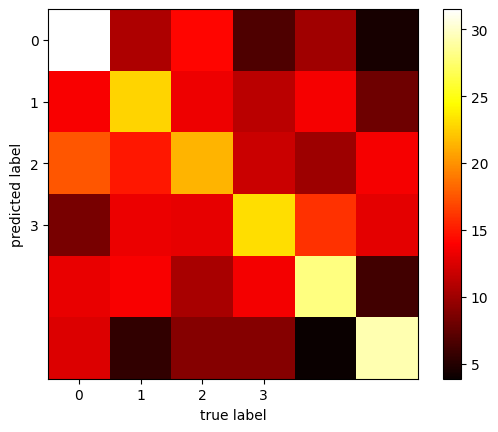

In [52]:
PlotConfusionMatrix(y_test.argmax(axis=1), y_test_pred)
pass

### RandomForest

In [53]:
parameters = { 
    'n_estimators': [50, 200],
    'max_depth' : [5, 25, 100],
    'random_state': [42]
}

random_forest_model = GridSearchCV(estimator=RandomForestClassifier(), 
                                   param_grid=parameters, 
                                   cv= 5)

random_forest_model.fit(X_train, y_train.argmax(axis = 1))

best_params_random_forest = GetBestResult(random_forest_model)

y_train_pred = GetPredictResults(random_forest_model, X_train)
y_test_pred = GetPredictResults(random_forest_model, X_test)

best_params: {'max_depth': 25, 'n_estimators': 200, 'random_state': 42}
best_score: 0.5795050534623742


In [54]:
result_table = AddResultsIntoTable(result_table,
                                "RandomForest GridSearch",
                                y_train.argmax(axis=1),
                                y_train_pred,
                                y_test.argmax(axis=1),
                                y_test_pred)

In [55]:
result_table

Model  Precision_train  Precision_test  \
0             LogisticRegression         0.488500        0.498471   
1  LogisticRegression GridSearch         0.487543        0.498946   
2        RandomForest GridSearch         0.945673        0.580645   

   Recall_train  Recall_test  F1_train   F1_test  
0      0.493183     0.505033  0.489048  0.498841  
1      0.492393     0.505274  0.488065  0.499126  
2      0.945932     0.587774  0.945773  0.582862

In [56]:
print(confusion_matrix(y_test.argmax(axis = 1), y_test_pred))

[[1056   74  185   55   78   24]
 [ 133  571  214  112  184   41]
 [ 217  182  550  193   90  180]
 [  43  129  197  658  258   87]
 [  82  123   83  156 1001   29]
 [  50   18   87   70   12  985]]


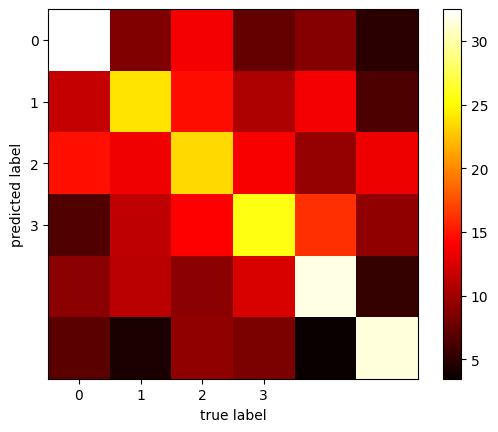

In [57]:
PlotConfusionMatrix(y_test.argmax(axis=1), y_test_pred)
pass

### Полносвязная нейронная сеть

In [58]:
parameters_mlp = {
    'hidden_layer_sizes': [(6, 6), (8, 6), (15, 6)],
    'activation': ['logistic'],
    'solver': ['lbfgs', 'adam', 'sgd'],
    'max_iter': [50, 100],
    'alpha': [1e-5, 1e-4, 1e-3],
    'random_state': [42]
}

mlp_classifier = GridSearchCV(MLPClassifier(),
                           parameters_mlp,
                           cv=10,
                           n_jobs=-1)

mlp_classifier.fit(X_train, y_train)

best_params = GetBestResult(mlp_classifier)

/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Converg

best_params: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (15, 6), 'max_iter': 100, 'random_state': 42, 'solver': 'lbfgs'}
best_score: 0.3360540384366117


/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [59]:
y_train_pred = GetPredictResults(mlp_classifier, X_train)
y_test_pred = GetPredictResults(mlp_classifier, X_test)

In [60]:
result_table = AddResultsIntoTable(result_table,
                                "MLPClassifier GridSearch",
                                y_train.argmax(axis = 1),
                                y_train_pred.argmax(axis = 1),
                                y_test.argmax(axis = 1),
                                y_test_pred.argmax(axis = 1))

In [61]:
result_table

Model  Precision_train  Precision_test  \
0             LogisticRegression         0.488500        0.498471   
1  LogisticRegression GridSearch         0.487543        0.498946   
2        RandomForest GridSearch         0.945673        0.580645   
3       MLPClassifier GridSearch         0.567342        0.607187   

   Recall_train  Recall_test  F1_train   F1_test  
0      0.493183     0.505033  0.489048  0.498841  
1      0.492393     0.505274  0.488065  0.499126  
2      0.945932     0.587774  0.945773  0.582862  
3      0.403219     0.407695  0.375162  0.375572

In [62]:
print(confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1)))

[[1421   18    0    3   23    7]
 [ 896  216    1   41   82   19]
 [1165   49    4   40   37  117]
 [ 826   43    0  290  152   61]
 [ 723   26    0   40  664   21]
 [ 385    4    1   38    7  787]]


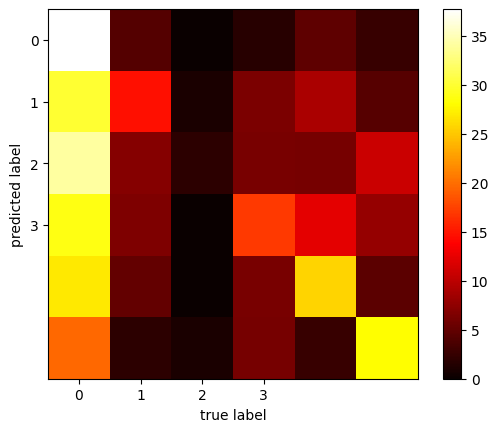

In [63]:
PlotConfusionMatrix(y_test.argmax(axis = 1), y_test_pred.argmax(axis=1))
pass

/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Converg

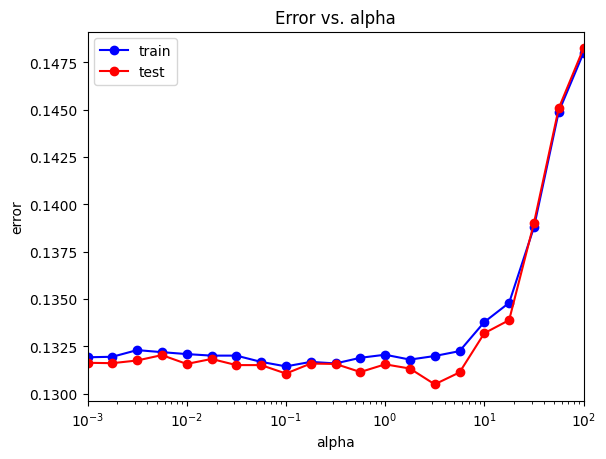

In [64]:
filtered_params = {key: value for key, 
                   value in best_params.items() if key != 'alpha'}
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha=alpha, **filtered_params)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vitalii/source/ml_unn_mag1/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Converg

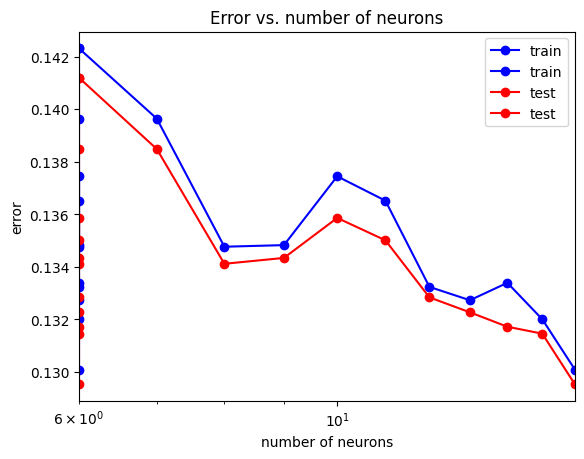

In [67]:
filtered_params = {key: value for key, 
                   value in best_params.items() if key != 'hidden_layer_sizes'}
from itertools import product

first_layer_neurons = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
second_layer_neurons = [6]
hidden_layer_sizes_arr = list(product(first_layer_neurons, second_layer_neurons))

test_err = []
train_err = []
train_acc = []
test_acc = []

for hidden_layer_sizes in hidden_layer_sizes_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, **filtered_params)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

plt.semilogx(hidden_layer_sizes_arr, train_err, 'b-o', label = 'train')
plt.semilogx(hidden_layer_sizes_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_sizes_arr), np.max(hidden_layer_sizes_arr)])
plt.title('Error vs. number of neurons')
plt.xlabel('number of neurons')
plt.ylabel('error')
plt.legend()

### Результаты и выводы

Мы обучили на наших данных логистическую регрессию, RandomForest и полносвязную (2 слоя) нейронную сеть. С помощью метода перекрёстного поиска по сетке (grid search) мы нашли оптимальные гиперпараметры для каждой модели. Для полносвязной нейронной сети мы также построили графики зависимости ошибки от различных значений гиперпараметров alpha (параметр регуляризации) и количества нейронов на первом слое.

In [68]:
result_table

Model  Precision_train  Precision_test  \
0             LogisticRegression         0.488500        0.498471   
1  LogisticRegression GridSearch         0.487543        0.498946   
2        RandomForest GridSearch         0.945673        0.580645   
3       MLPClassifier GridSearch         0.567342        0.607187   

   Recall_train  Recall_test  F1_train   F1_test  
0      0.493183     0.505033  0.489048  0.498841  
1      0.492393     0.505274  0.488065  0.499126  
2      0.945932     0.587774  0.945773  0.582862  
3      0.403219     0.407695  0.375162  0.375572

В данной таблице представлены значения метрик для каждой из моделей на тренировочных и тестовых данных. Мы видим, что наилучший результат в нашей работе демонстрируем модель RandomForest с подобраными оптимальными гиперпараметрами. Данная модель показывает высокие значения метрик precision, recall и F1 на тренировочных данных. В тоже время на тестовых данных получен наилучший результат среди всех моделей, но недостаточный для того, чтобы считать данную конфигурацию модели хорошей для решения нашей задачи классификации. Скорее всего, модель склонна к переобучению.  
Оставшиеся модели показывают одинаковый средний результат на тренировочной и тестовой выборке. Стоит отметить, что по метрике precision хорошо показывает себя полносвязная нейронная сеть с 2 слоями.

In [69]:
best_params_random_forest

{'max_depth': 25, 'n_estimators': 200, 'random_state': 42}

In [70]:
random_forest_model_best = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    random_state=42
)

random_forest_model_best.fit(X=X_train, y=y_train)

y_train_pred = GetPredictResults(random_forest_model, X_train)
y_test_pred = GetPredictResults(random_forest_model, X_test)

result_table = AddResultsIntoTable(result_table,
                                "RandomForest best",
                                y_train.argmax(axis=1),
                                y_train_pred,
                                y_test.argmax(axis=1),
                                y_test_pred)

result_table

Model  Precision_train  Precision_test  \
0             LogisticRegression         0.488500        0.498471   
1  LogisticRegression GridSearch         0.487543        0.498946   
2        RandomForest GridSearch         0.945673        0.580645   
3       MLPClassifier GridSearch         0.567342        0.607187   
4              RandomForest best         0.945673        0.580645   

   Recall_train  Recall_test  F1_train   F1_test  
0      0.493183     0.505033  0.489048  0.498841  
1      0.492393     0.505274  0.488065  0.499126  
2      0.945932     0.587774  0.945773  0.582862  
3      0.403219     0.407695  0.375162  0.375572  
4      0.945932     0.587774  0.945773  0.582862